# 1. 데이터 가져오기

In [2]:
df = read.csv("Project/pdata/report_0809.csv")
names(df)
head(df)

[1] "Country"                          "Year"                            
 [3] "Life.Ladder"                      "Log.GDP.per.capita"              
 [5] "Social.support"                   "Healthy.life.expectancy.at.birth"
 [7] "Freedom.to.make.life.choices"     "Generosity"                      
 [9] "Perceptions.of.corruption"        "schooling"                       
[11] "alcohol.disorders"                "suicide.rates"                   
[13] "Obesity"                          "Fertility"                       
[15] "DALYs.Mental.disorders"

Country,Year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,schooling,alcohol.disorders,suicide.rates,Obesity,Fertility,DALYs.Mental.disorders
Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,3.0,0.7901894,0.5896119,5.77,6.373,2.298615
Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,3.1,0.7708637,0.6046841,6.23,6.180,2.406117
Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,3.2,0.7569276,0.6264676,6.60,5.977,2.539439
Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,3.3,0.7403437,0.6460586,6.87,5.770,2.656310
Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,3.4,0.7241509,0.6583662,7.08,5.562,2.745618
Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,3.5,0.7100469,0.6780369,7.34,5.359,2.852844


# 2. 회귀적합

In [4]:
fit<-lm(Life.Ladder ~ Log.GDP.per.capita+Social.support+Healthy.life.expectancy.at.birth+ 
          Freedom.to.make.life.choices +Generosity + Perceptions.of.corruption + schooling + 
          alcohol.disorders +suicide.rates + Obesity + Fertility + DALYs.Mental.disorders, data=df)


# 3. 회귀진단

##### 첫번째 그래프 => 1265, 1075, 1548 이상치
##### 두번째 그래프 => 1265, 1648, 1547 정규성 벗어남
##### 세번째 그래프 => 1265, 1547, 148 큰 표준화잔차 가짐

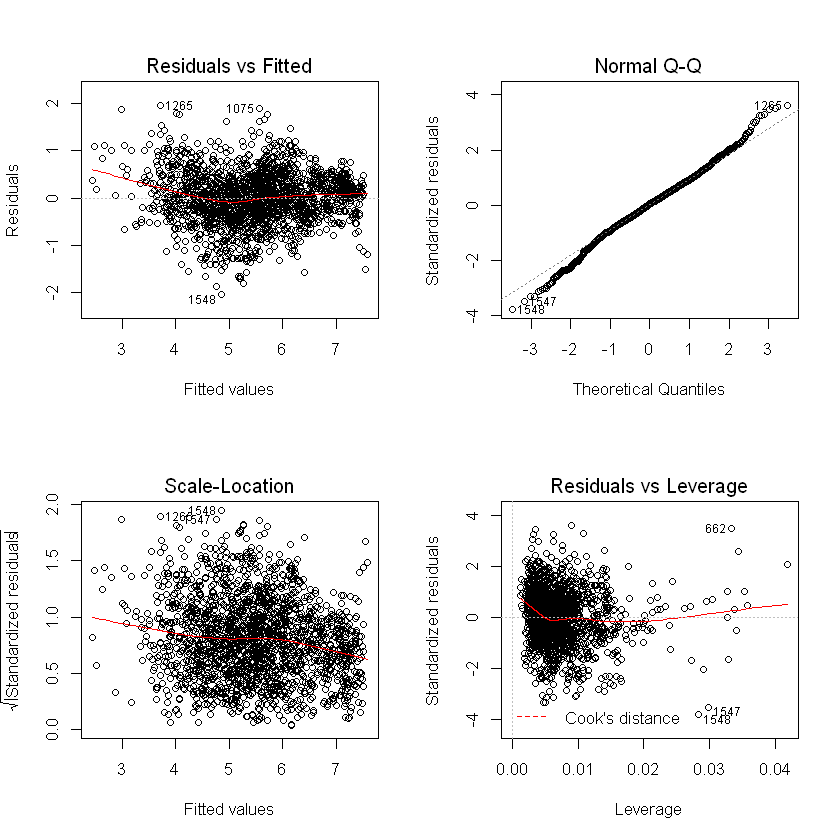

In [6]:
par(mfrow=c(2,2))
plot(fit)

## 회귀진단 - Car package 이용


In [7]:
install.packages('car')
library(car)

Installing package into 'C:/Users/KangJaeyeon/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependency 'lme4'




  There are binary versions available but the source versions are later:
     binary   source needs_compilation
lme4 1.1-26 1.1-27.1              TRUE
car  3.0-10   3.0-11             FALSE

  Binaries will be installed
package 'lme4' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\KangJaeyeon\AppData\Local\Temp\RtmpsnFjyn\downloaded_packages


installing the source package 'car'

Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

### 1. 정규성

[1] 1265 1548

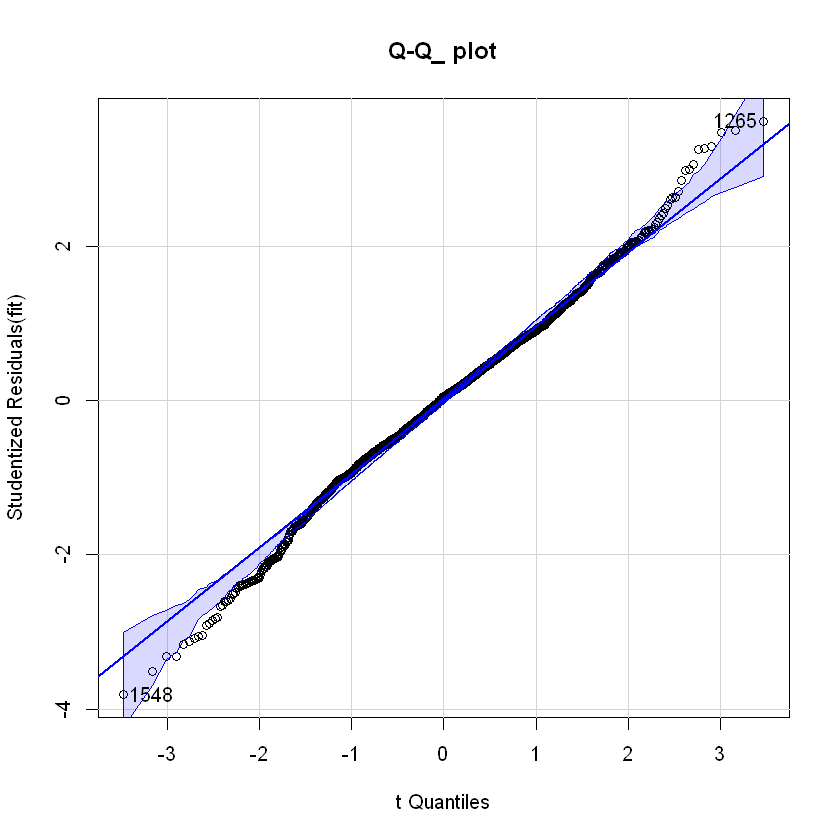

In [9]:
qqPlot(fit,main="Q-Q_ plot")  # 1265 1548

### Shapiro-Wilk test

In [21]:
shapiro.test(rstandard(fit))  # H0:정규분포 따른다. p-value = 4.982e-07 => H0 기각 . 정규분포 따르지 않음


	Shapiro-Wilk normality test

data:  rstandard(fit)
W = 0.99392, p-value = 4.982e-07


#### 실제값과 적합값 차이 크게 발생

In [11]:
# 실제값
df["1265",]  # Life Ladder : 5.671
df["1548",]  # Life Ladder : 2.817

# 적합값
fitted(fit)["1265"]  # 3.715534
fitted(fit)["1548"]  # 4.854114 

,Country,Year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,schooling,alcohol.disorders,suicide.rates,Obesity,Fertility,DALYs.Mental.disorders
1265,Pakistan,2007,5.671,8.277,0.479,55,0.396,0.089,0.794,4.4,0.9744702,0.5791493,5.07,4.211,2.603388


,Country,Year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,schooling,alcohol.disorders,suicide.rates,Obesity,Fertility,DALYs.Mental.disorders
1548,South Sudan,2017,2.817,10.648,0.557,51,0.456,-0.106,0.761,4.8,2.144866,0.6115541,1.56,4.775,1.787956


1265 
3.719593

1548 
4.851455

### 잔차와 표준화잔차 확인

In [12]:
# 잔차
residuals(fit)["1265"]
residuals(fit)["1548"]

# 표준화잔차
rstudent(fit)["1265"]
rstudent(fit)["1548"]

1265 
1.951407

1548 
-2.034455

1265 
3.620017

1548 
-3.812682

### 오차 분포 확인

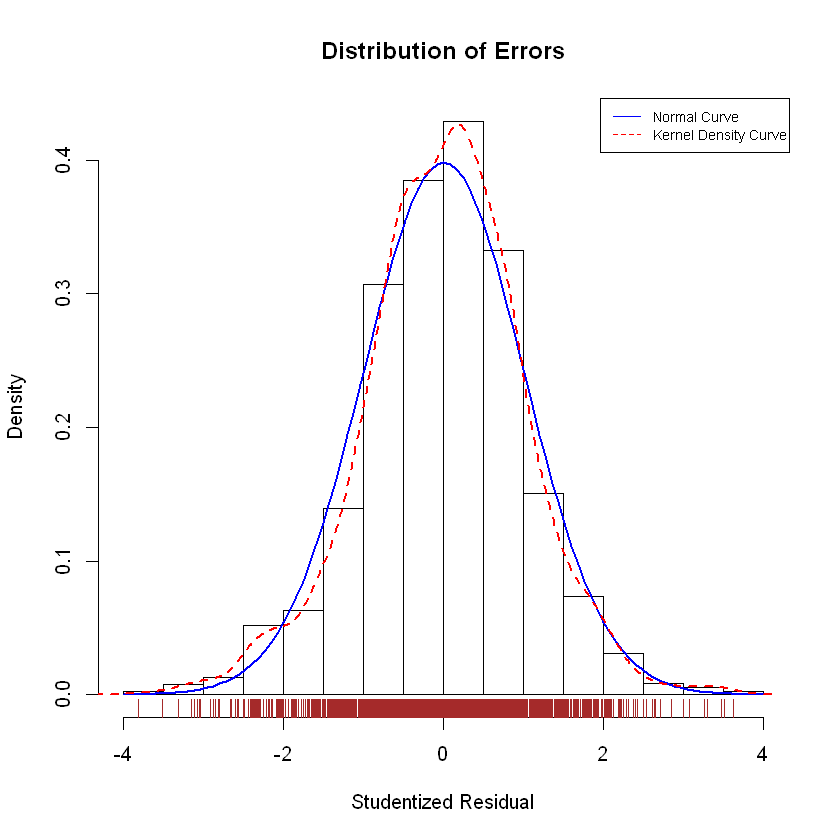

In [13]:
residplot <- function(fit, nbreaks) {
  z <- rstudent(fit)
  hist(z, breaks=nbreaks, freq=FALSE,xlab="Studentized Residual",
       main="Distribution of Errors")
  rug(jitter(z), col="brown")
  curve(dnorm(x, mean=mean(z), sd=sd(z)),add=TRUE, col="blue", lwd=2)
  lines(density(z)$x, density(z)$y,col="red", lwd=2, lty=2)
  legend("topright",legend = c( "Normal Curve", "Kernel Density Curve"),
         lty=1:2, col=c("blue","red"), cex=.7)
}
residplot(fit, 20)

### 2. 독립성

In [15]:
install.packages('lmtest')
library(lmtest) 
dwtest(fit)   # DW 값이 2에 가까워야 함. DW = 0.61751 로 자기상관성이 있음

Installing package into 'C:/Users/KangJaeyeon/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\KangJaeyeon\AppData\Local\Temp\RtmpsnFjyn\downloaded_packages


Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




	Durbin-Watson test

data:  fit
DW = 0.61751, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


### 3. 선형성

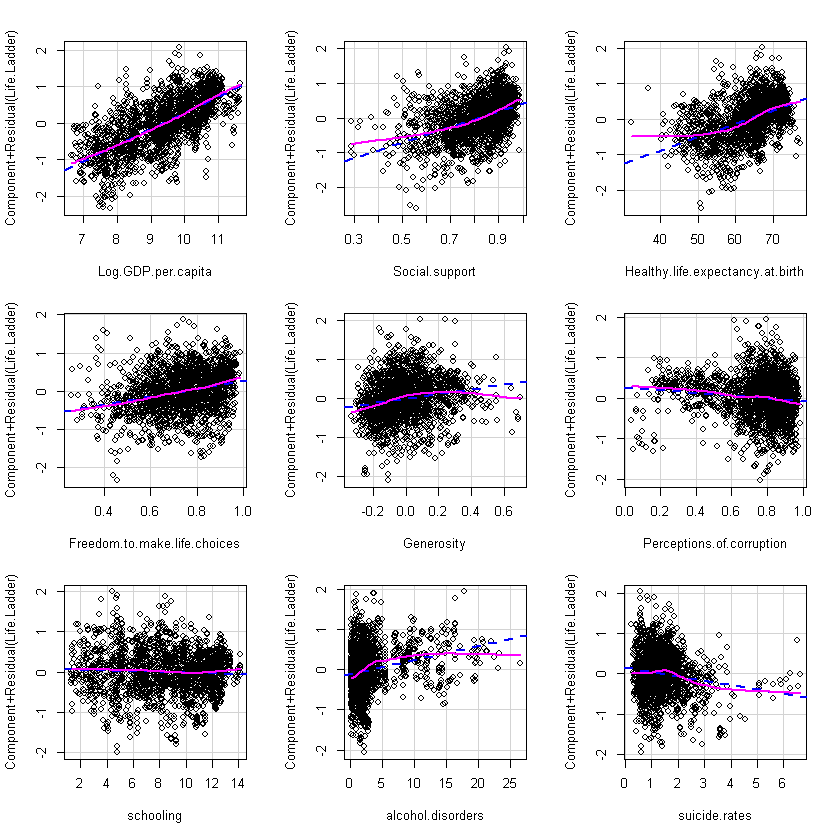

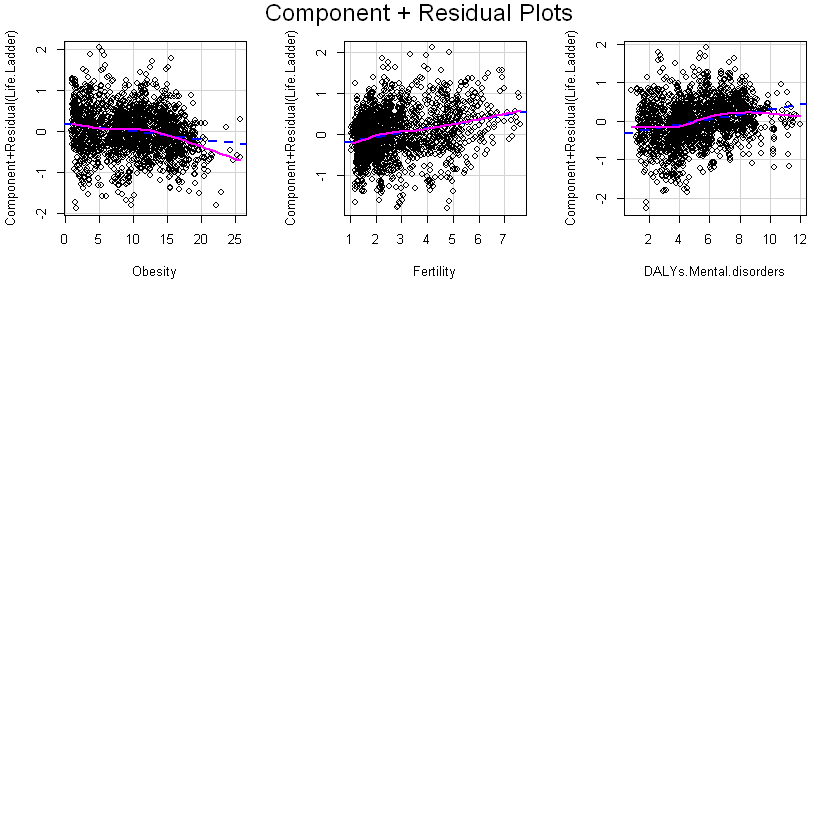

In [18]:
# partial residual plot
crPlots(fit)  # 선형성 만족하는 것으로 보임

### 4. 등분산성

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 62.16525, Df = 1, p = 3.1581e-15


Suggested power transformation:  1.65852 

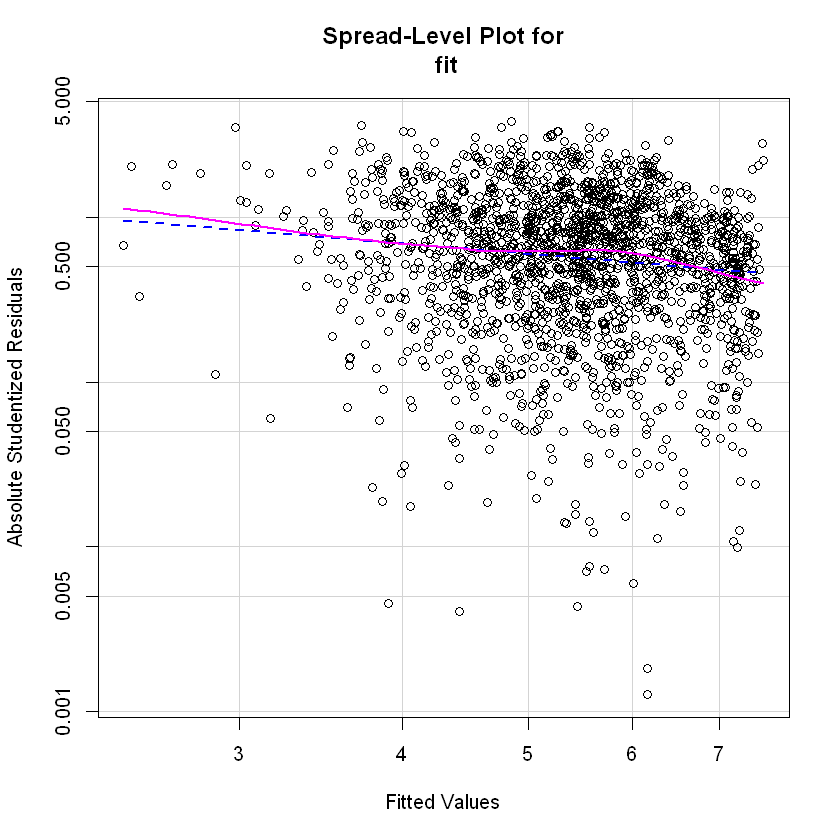

In [17]:
par(mfrow=c(1,1))
ncvTest(fit)          # p = 3.1581e-15 로 유의 -> 등분산성의 가정 위배- > nonhorizontal line 보여줌. 

spreadLevelPlot(fit)  # power transforamtion 값 제시 : 1.65852 
# Suggested power transformation 값은 일정하지 않은 오차의 분산을 안정화시키기 위해 필요한 power transforamtion 값 제시 : 1.65852 
# ex) 0.5의 경우 Y대신 sqrt(Y) 사용

## 선형모형 가정에 대한 전반적 검증

In [22]:
install.packages('gvlma')
library(gvlma)
gvmodel <- gvlma(fit)
summary(gvmodel)

# Global stat의 p값이 0.05 이하이므로 어느 부분이 위배되었는지 평가해야함. 

Installing package into 'C:/Users/KangJaeyeon/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'gvlma' is in use and will not be installed"


Call:
lm(formula = Life.Ladder ~ Log.GDP.per.capita + Social.support + 
    Healthy.life.expectancy.at.birth + Freedom.to.make.life.choices + 
    Generosity + Perceptions.of.corruption + schooling + alcohol.disorders + 
    suicide.rates + Obesity + Fertility + DALYs.Mental.disorders, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03446 -0.32692  0.02628  0.34600  1.95141 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -3.706453   0.364035 -10.182  < 2e-16 ***
Log.GDP.per.capita                0.439392   0.026860  16.358  < 2e-16 ***
Social.support                    2.249297   0.156626  14.361  < 2e-16 ***
Healthy.life.expectancy.at.birth  0.037755   0.004647   8.125 7.99e-16 ***
Freedom.to.make.life.choices      1.037370   0.113668   9.126  < 2e-16 ***
Generosity                        0.584595   0.088772   6.585 5.87e-11 ***
Perceptions.of.corruption        -0.344755   0.08800

## 이상치 테스트
##### 비정상적으로 큰 양수 또는 음수의 잔차를 가짐. 잔차가 양성인 경우 모형이 반응변수를 저평가한 것, 음성인 경우 과대평가한 것. 표준잔차의 2배 이상으로 크거나 -2배 이상으로 작은 값은 이상치.

In [23]:
outlierTest(fit)  # 1548는 이상치

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
      rstudent unadjusted p-value Bonferroni p
1548 -3.812682         0.00014189      0.26917

## 큰지레점(High leverage points)

##### 예측변수의 이상치. 평균 hat 값의 2~3배 이상 큰 수치를 가지는 관측치는 검사해 봐야 함. 

integer(0)

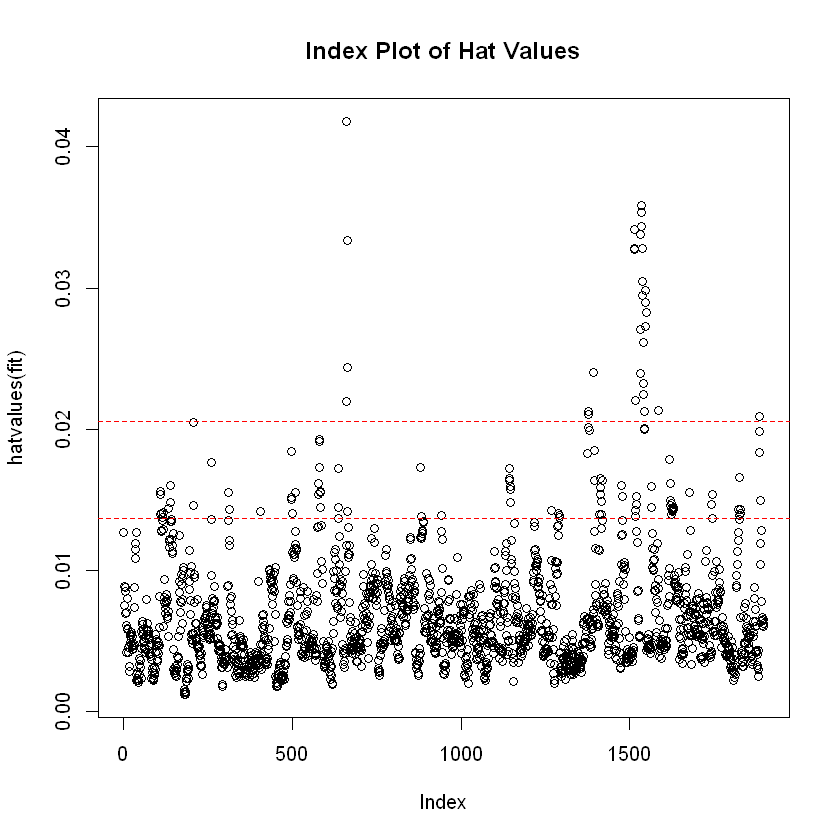

In [29]:
hat.plot=function(fit){
  p=length(coefficients(fit))
  n=length(fitted(fit))
  plot(hatvalues(fit), main="Index Plot of Hat Values")
  abline(h=c(2,3)*p/n, col="red", lty=2)
  identify(1:n, hatvalues(fit), names(hatvalues(fit)))
}

hat.plot(fit)

In [30]:
# 3배 이상인 개체들의 인덱스 번호 
p=length(coefficients(fit))
n=length(fitted(fit))
which(hatvalues(fit)>3*p/n)

660  661  662  663 1377 1378 1393 1512 1513 1514 1515 1530 1531 1532 1533 1534 
 660  661  662  663 1377 1378 1393 1512 1513 1514 1515 1530 1531 1532 1533 1534 
1535 1536 1537 1538 1539 1540 1541 1542 1545 1546 1547 1548 1583 1883 
1535 1536 1537 1538 1539 1540 1541 1542 1545 1546 1547 1548 1583 1883

## 영향 관측치 (influential observation)
##### 관측치를 제거함으로써 모형이 극적으로 달라지게 되는 경우가 있는데 이러한 관측치가 영향관측치 .Cook’s distance 값이 4/(n-k-1)보다 큰 관측치는 영향관측치이다. 이때 n은 샘플 크기이며 k는 예측변수의 수.

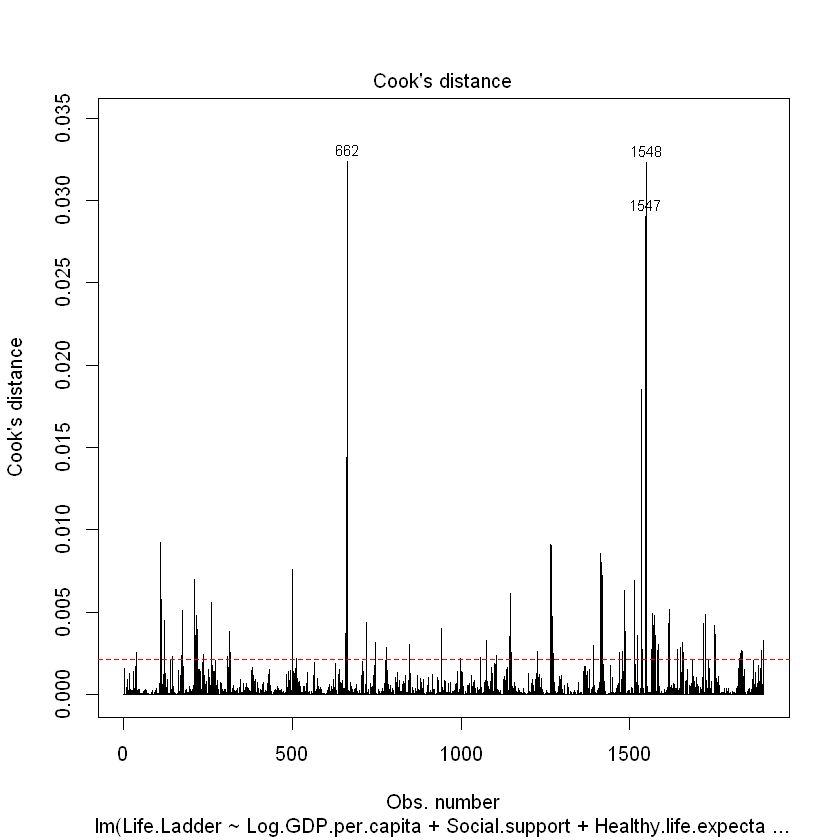

In [32]:
cutoff=4/(nrow(df)-length(fit$coefficients)-2)
plot(fit, which=4, cook.levels=cutoff)
abline(h=cutoff, lty=2, col="red")

# 662, 1548, 1547